<a href="https://colab.research.google.com/github/Hadeersamirr/ML/blob/main/Telco_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Group project names and ID

Hadeer Samir 191900133

Josephine ossama  191900145

lana wael 191900085

yasmina maged 191900061

lojain Mohamed 191900269

we aim to identify the year with the highest frequency of churn occurrences, shedding light on pivotal periods of customer turnover within the telecommunications company.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#  Data Loading


In [100]:
#load data
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Data Cleaning

In [101]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
data.shape

(7043, 21)

In [104]:
# Display data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [105]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [106]:
data.drop_duplicates(inplace=True)

In [107]:
data.duplicated().any()

False

In [108]:
data.drop(columns=['customerID'], inplace=True)


In [109]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [110]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [111]:
data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [112]:
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [113]:
data.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [114]:
# Check for new missing values after conversion
data['TotalCharges'].isnull().sum()

11

In [115]:
#Handling missing values
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
data['TotalCharges'].isnull().sum()

0

In [116]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#**Data Visualization**

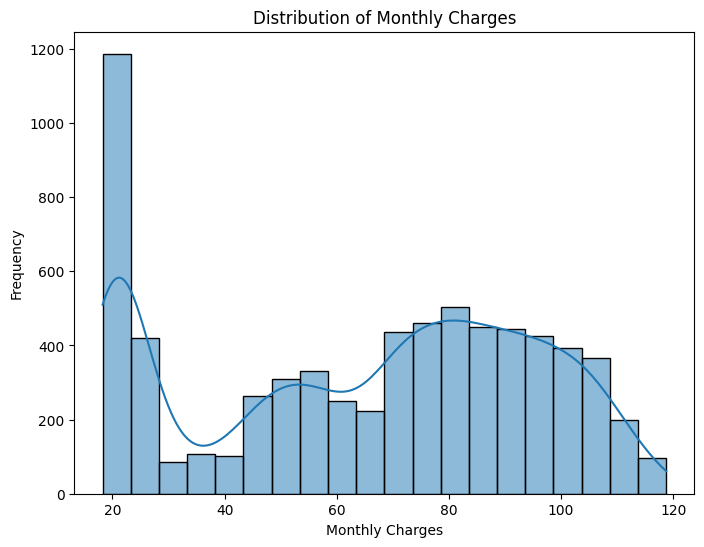

In [118]:
# Histogram of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(data['MonthlyCharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

The histogram indicating two primary groups of customers: one paying lower charges likely for basic services, and another paying higher charges for premium services. This suggests opportunities for targeted marketing and
service enhancements to cater to these distinct customer segments

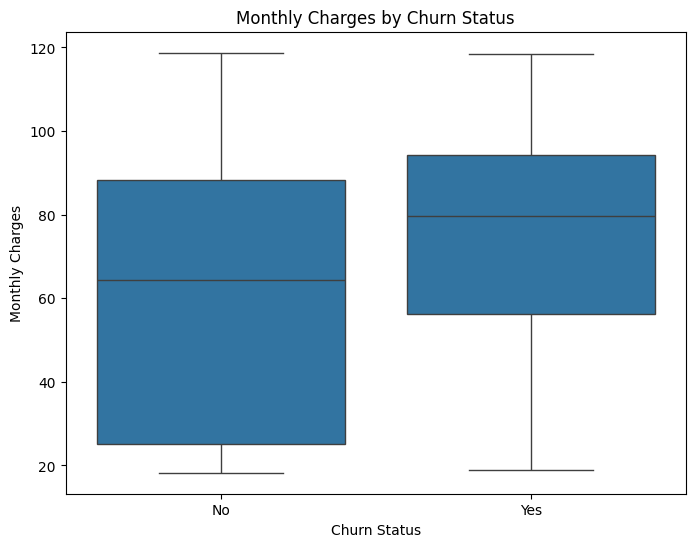

In [119]:
# Box plot of Monthly Charges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()

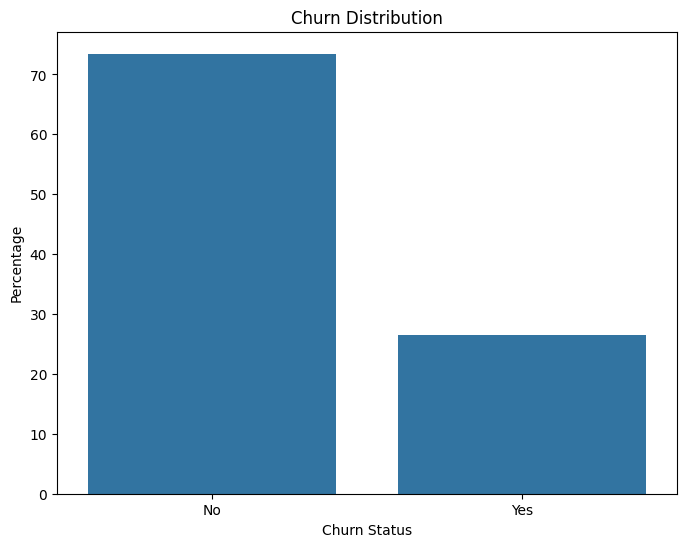

In [120]:
# Bar Chart of Churn Distribution
churn_distribution = data['Churn'].value_counts(normalize=True) * 100  # Normalizing the count to get percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_distribution.index, y=churn_distribution.values)
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.show()


boxplot indicate the need for possibly reevaluating the pricing strategy for higher-risk segments identified by their higher monthly charges.

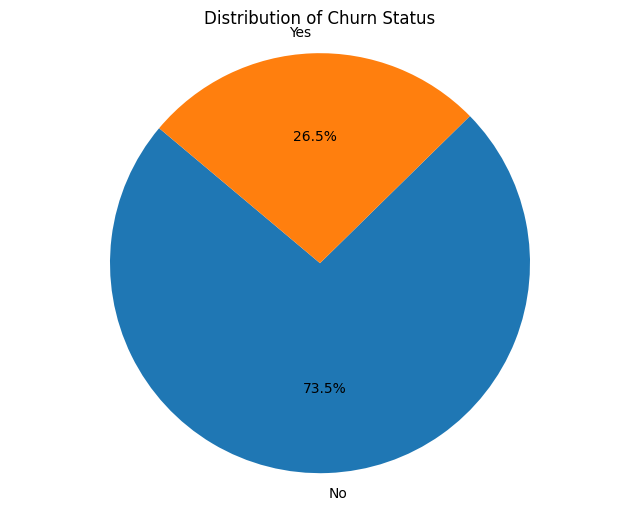

In [121]:
# Pie chart for Churn Distribution
churn_counts = data['Churn'].value_counts()

# Extract labels and sizes for the pie chart
labels = churn_counts.index
sizes = churn_counts.values

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Churn Status')
plt.axis('equal')
plt.show()

This pie chart provides a clear and immediate visual reference to understand the proportion of churn.



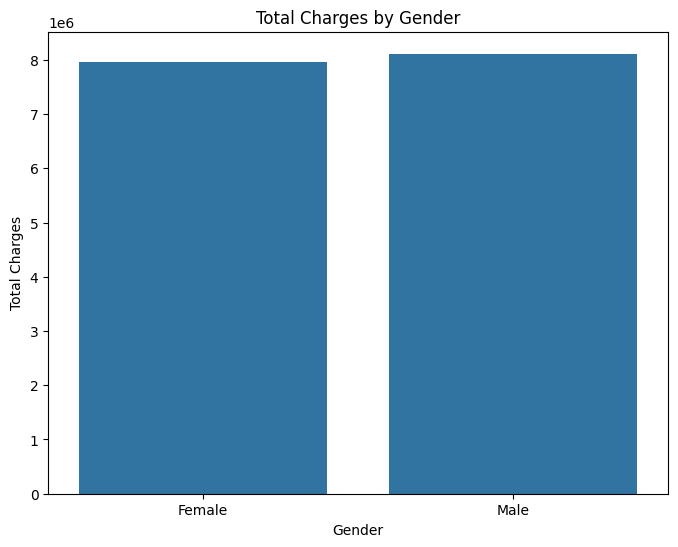

In [122]:
# Aggregate total charges by gender
total_charges_by_gender = data.groupby('gender')['TotalCharges'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='TotalCharges', data=total_charges_by_gender)
plt.title('Total Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Charges')
plt.show()


This chart serves as a basis to confirm that gender does not lead to significant differences in spending behavior within this dataset.

#  **Model Building and Evaluation**

#  Random Forest Classifier


In [123]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
# Assuming 'model1' is your RandomForestClassifier and it has been instantiated correctly.
model1.fit(X_train, y_train)

# Predicting on both training and test datasets
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

In [138]:
# Calculating accuracy on both training and test datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [137]:
# Display accuracies and classification report for the test dataset
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.8033368832090877
Test Accuracy: 0.8183108587650816

Classification Report (Test Set):
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



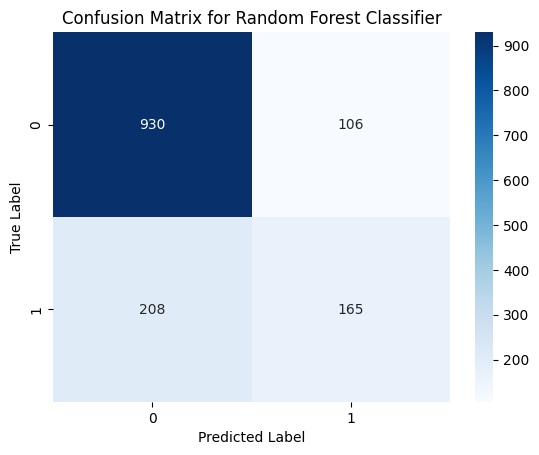

In [128]:
## Confusion matrix for  Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Using Seaborn to create a heatmap for the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#Logistic Regression Classifier

In [129]:
# Create an instance of Logistic Regression Classifier and fit the data.
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [130]:
# Predicting the training and test set results
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [131]:
# Predicting the training and test set results
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [132]:
# Calculate the accuracy on training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [133]:
# Display accuracies and classification report
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.8033368832090877
Test Accuracy: 0.8183108587650816

Classification Report (Test Set):
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [134]:
# Predict probabilities
probabilities = model.predict_proba(X_test)

# Display some predicted probabilities
print("\nSome predicted probabilities:\n", probabilities[:5])



Some predicted probabilities:
 [[0.28737948 0.71262052]
 [0.94949504 0.05050496]
 [0.99354638 0.00645362]
 [0.40521228 0.59478772]
 [0.99175983 0.00824017]]


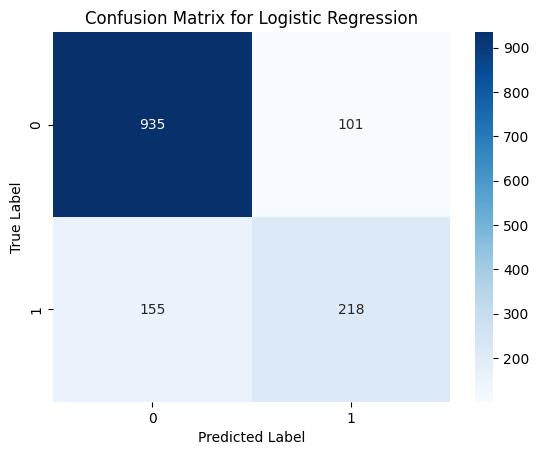

In [135]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Using Seaborn to create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


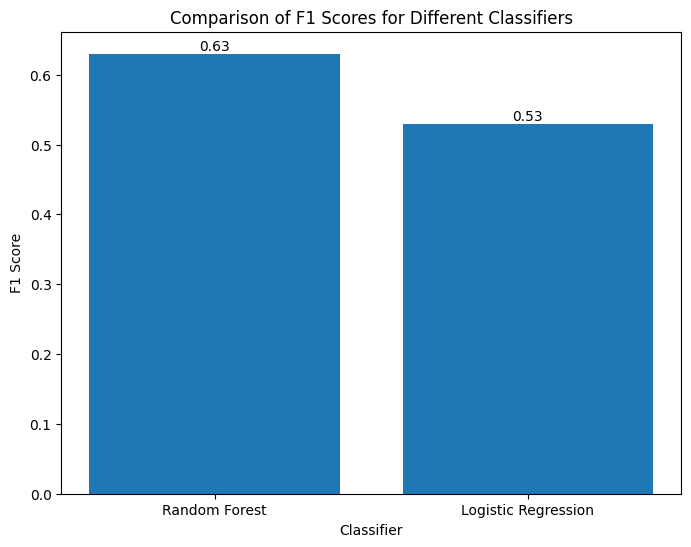

In [139]:
f1_scores = [0.63 ,0.53]  # Replace with your actual F1 scores


classifiers = [ "Random Forest", "Logistic Regression"]


plt.figure(figsize=(8, 6))
plt.bar(classifiers, f1_scores)
plt.xlabel("Classifier")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Scores for Different Classifiers")


for i, score in enumerate(f1_scores):
    plt.text(i, score, str(round(score, 2)), ha='center', va='bottom')

plt.show()

From this comparison, the F1 score of the Random Forest classifier (0.63) is higher than that of Logistic Regression (0.53), indicating a better balance between precision and recall for the Random Forest model in this classification task